# Análisis  de Datos

## 1.Descripción de archivo base

Los datos comprenden base de datos con las siguientes columnas, generadas por medio de Google Analytics


**1.brandingInterest:** Esta variable muestra  el tipo  de interés que tuvieron los usuarios que se encuentran en etapas avanzadas del proceso de compra. Los usuarios se registran en diferentes categorías según sus intereses. Por ejemplo, “Estilos de vida y hobbies/Amantes de los animales” o “Viajeros/Fans de los viajes/Viajeros de playa”.

**2.userAgeBracket:** Esta variable se utiliza para agrupar a los usuarios en categorías o brackets de edad. Los brackets de edad son rangos específicos que abarcan un conjunto de edades similares. Por ejemplo, los brackets podrían ser "Menores de 18 años", "De 18 a 25 años", "De 26 a 35 años" y así sucesivamente. Esta variable ayuda a comprender la distribución de edades de los usuarios en el conjunto de datos.

**3.userGender:** Esta variable indica el género o sexo de los usuarios. Puede tomar valores como "Masculino", "Femenino", "No binario" u otras categorías que representen la identidad de género de los usuarios. El propósito de esta variable es analizar la composición de género de la audiencia o realizar análisis específicos relacionados con el género.

**4.country:** Esta variable indica el país de origen o ubicación geográfica de los usuarios. Cada valor corresponde a un país específico, como "Estados Unidos", "Canadá", "Reino Unido", etc. El país de origen es útil para realizar análisis geográficos, como la segmentación de usuarios por ubicación geográfica.

**5.region:** Muestra la zona geográfica de donde viene el usuario, basándose en su IP.

**6.sessions:** Muestra el número de sesiones que superaron los 10 segundos, lograron una conversión o tuvieron 2 o más visitas.

Información basada en el sitio de Google Analytics Data API Google Developers (Developers, 2023) donde describen la generación de los datos generados desde Google Analytics.


## Cargue base de datos

In [47]:
## librerias utilizadas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
## Cargar archivo
df = pd.read_csv("Base consolidada oficial.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brandingInterest  5870 non-null   object
 1   userAgeBracket    5870 non-null   object
 2   userGender        5870 non-null   object
 3   country           5870 non-null   object
 4   region            5870 non-null   object
 5   sessions          5870 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 275.3+ KB


In [49]:
df.head(2)

,brandingInterest,userAgeBracket,userGender,country,region,sessions
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106


La columna 'brandingInterest' tiene de forma concatenada y separa con '/' los intereses de las peronas por lo tanto se realiza una transformación de los datos para poder separarlos y mejorar el análisis según los intereses únicos.

## Transformación base de datos

In [51]:
#Copia de la base de datos original
df_transformada = df.copy()
#Separar por columnas los intereses
df_transformada[['int1', 'int2', 'int3', 'int4']] = df_transformada['brandingInterest'].str.split('/', n=3, expand=True)
#Contar el nùmero de intereses totales para dividir equitativamente las sesiones
df_transformada['N_intreses'] = 4-df_transformada.isna().sum(axis=1)
df_transformada['sessions'] = df_transformada['sessions']/df_transformada['N_intreses']

In [52]:
df_transformada2=pd.melt(df_transformada, id_vars=['userAgeBracket','userGender','country','region','sessions'], value_vars=['int1', 'int2','int3', 'int4'])
df_transformada2["brandingInterest"] = df_transformada2["value"]
df_transformada2 = df_transformada2.drop(columns=['variable'])
df_transformada2 = df_transformada2.drop(columns=['value'])

In [53]:
df_transformada2.head(1)

,userAgeBracket,userGender,country,region,sessions,brandingInterest
0,25-34,female,United States,California,35.666667,News & Politics


In [54]:
df = df_transformada2.dropna(subset=['brandingInterest'], axis=0)
df.head(1)
df.to_csv("Base transformada.csv")

In [55]:
## Ver las primeras dos filas de la base de datos
df.head(1)

,userAgeBracket,userGender,country,region,sessions,brandingInterest
0,25-34,female,United States,California,35.666667,News & Politics


## Análisis base de datos

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14316 entries, 0 to 23356
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userAgeBracket    14316 non-null  object 
 1   userGender        14316 non-null  object 
 2   country           14316 non-null  object 
 3   region            14316 non-null  object 
 4   sessions          14316 non-null  float64
 5   brandingInterest  14316 non-null  object 
dtypes: float64(1), object(5)
memory usage: 782.9+ KB


Pasamos de 5870 registros a  14316  registros de la base de datos y no hay ningùn registro de datos vacio.

In [57]:
df.nunique()

userAgeBracket        7
userGender            3
country               1
region               20
sessions            348
brandingInterest    116
dtype: int64

La variable brandingInterest tiene 116 valores unicos, hay 7 grupos etareos comprendidos en la variable userAgeBracket, 3 generos diferenciados en userGender, todos los datos comprenden solo un paìs y 20 regiones. 

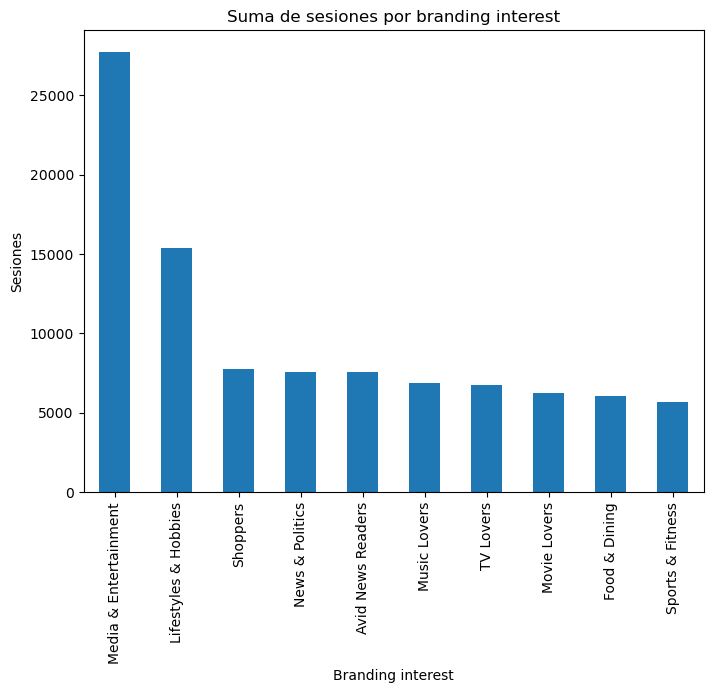

In [58]:
# Agrupar y sumar sesiones por branding interest
df_grouped = df.groupby('brandingInterest')['sessions'].sum()
# Ordenar y seleccionar los primeros 10 valores
df_top10 = df_grouped.sort_values(ascending=False).head(10)
# Crear la gráfica de barras
df_top10.plot.bar(title='Suma de sesiones por branding interest', xlabel='Branding interest', ylabel='Sesiones', figsize=(8,6))
plt.show()

In [59]:
# Calcular el porcentaje del total
df_top10_pct = df_top10.apply(lambda x: x / df_grouped.sum() * 100).round(2)

# Mostrar el resultado
df_top10_pct.sum()

47.13

In [60]:
df

,userAgeBracket,userGender,country,region,sessions,brandingInterest
0,25-34,female,United States,California,35.666667,News & Politics
1,35-44,female,United States,California,35.333333,News & Politics
2,35-44,female,United States,California,49.500000,Media & Entertainment
3,35-44,female,United States,California,47.500000,Media & Entertainment
4,35-44,female,United States,California,47.500000,Media & Entertainment
...,...,...,...,...,...,...
23113,25-34,male,United States,Illinois,2.750000,Frequently Eats Dinner Out
23114,55-64,male,United States,Illinois,2.750000,Frequently Eats Lunch Out
23354,18-24,male,United States,California,2.500000,Frequently Eats Dinner Out
23355,25-34,male,United States,Illinois,2.500000,Frequently Eats Lunch Out


En la variable brandingInterest se puede observar que "Media & Entertrainment" es el interes más alto, seguido por "Lifestyles & Hobbies". El top 10 comprende el 47% del total de las sesiones.

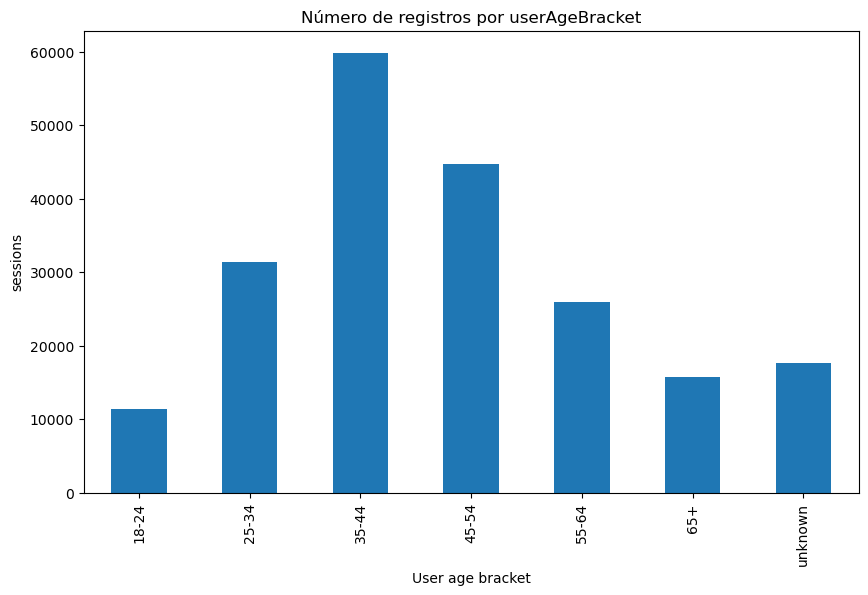

In [61]:
# Agrupar y contar registros por userAgeBracket
df_age = df.groupby('userAgeBracket')['sessions'].sum()

# Crear la gráfica de columnas
df_age.plot.bar(title='Número de registros por userAgeBracket', xlabel='User age bracket', ylabel='sessions', figsize=(10,6))
plt.show()

In [62]:
df_age['35-44']/df_age.sum()

0.289807591800391

Las sesiones que mayor tiene numero de sesiones es de 35 a 44 años, que comprende un total 59887 de sesiones que comprende un 28.98% de los datos 

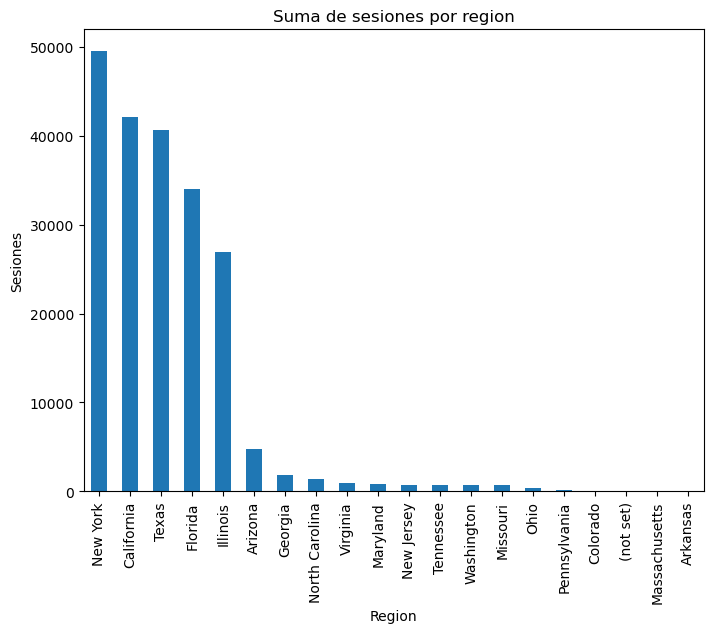

In [63]:
# Agrupar y sumar sesiones por branding interest
df_grouped = df.groupby('region')['sessions'].sum()
df_order = df_grouped.sort_values(ascending=False).head(20)
# Crear la gráfica de barras
df_order.plot.bar(title='Suma de sesiones por region', xlabel='Region', ylabel='Sesiones', figsize=(8,6))
plt.show()

In [64]:
df_order.head(5)

region
New York      49502.0
California    42146.0
Texas         40695.0
Florida       34002.0
Illinois      26932.0
Name: sessions, dtype: float64

In [46]:
df_order.sum()

206644.0

Las region con numero de sesiones es de New York con 49502 sesiones de un total de 206644 sesiones en el total de registros. 